In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [57]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/Kwach/Downloads


In [59]:
import pandas as pd

# Load the dataset using the absolute path
data_path = "/Users/Kwach/Downloads/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())


           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  


In [60]:
print("initial dataset info:")
print(df.info())
print("\nFirst Few Rows of the Dataset:")
print(df.head())

initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB
None

First Few Rows of the Dataset:
           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan  

In [61]:
#Check the missing values
missing_values = df.isnull().sum()
print("/nmissing values in each clumn")
print(df.info())
print(missing_values[missing_values>0])


/nmissing values in each clumn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB
None
AverageTemperature               11002
AverageTemperatureUncertainty    11002
dtype: int64


In [64]:
#Remove dublicates
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
final_row_count = df.shape[0]
print(f"\nRemoved {initial_row_count - final_row_count} duplicate rows.")

# 3. Convert data types
# Convert 'dt' to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Check data types
print("\nData Types After Conversion:")
print(df.dtypes)



Removed 0 duplicate rows.

Data Types After Conversion:
dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object


In [66]:
print("/ndescreptive statistics")
print(df.describe())

/ndescreptive statistics
                                  dt  AverageTemperature  \
count                         239177       228175.000000   
mean   1910-11-08 03:29:45.557976064           18.125969   
min              1743-11-01 00:00:00          -26.772000   
25%              1864-02-01 00:00:00           12.710000   
50%              1914-02-01 00:00:00           20.428000   
75%              1963-12-01 00:00:00           25.918000   
max              2013-09-01 00:00:00           38.283000   
std                              NaN           10.024800   

       AverageTemperatureUncertainty  
count                  228175.000000  
mean                        0.969343  
min                         0.040000  
25%                         0.340000  
50%                         0.592000  
75%                         1.320000  
max                        14.037000  
std                         0.979644  


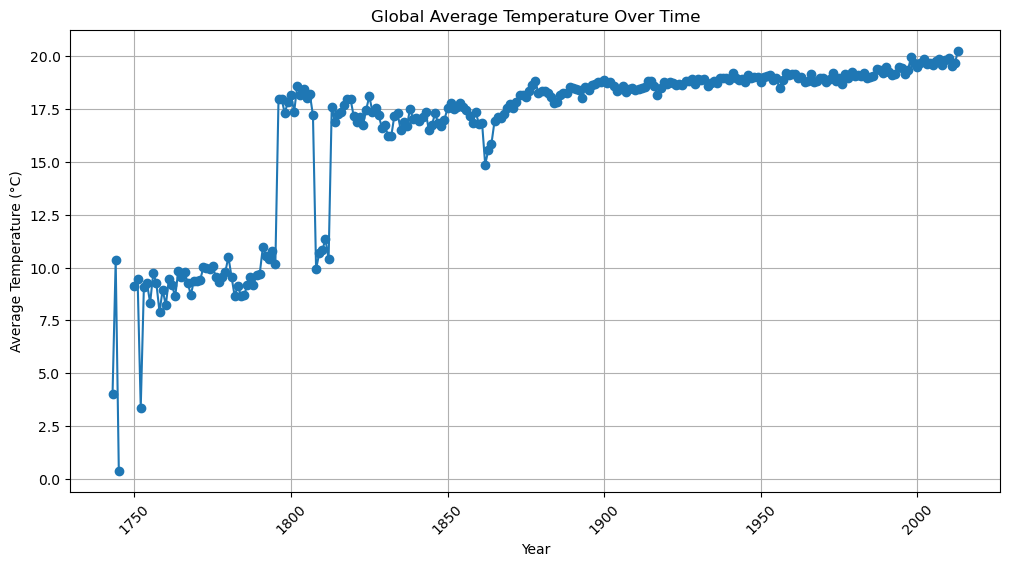

/var/folders/54/k8j956z96xqc9_fc7073216r0000gn/T/ipykernel_18945/4213755884.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AverageTemperature', y='City', data=city_avg_temp.head(10), palette='viridis')


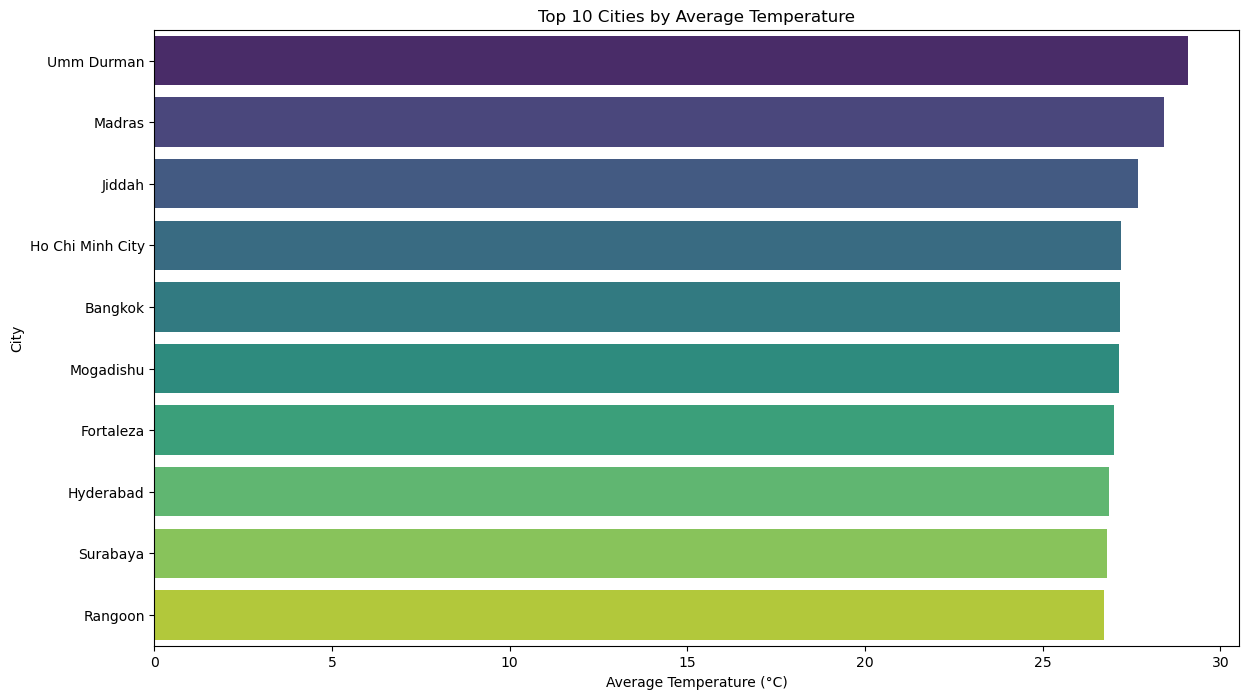


Correlation Matrix:
                        Year  AverageTemperature
Year                1.000000            0.146691
AverageTemperature  0.146691            1.000000


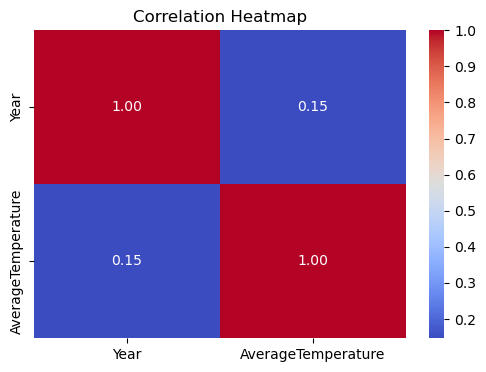

In [67]:
# 2. Trend Analysis: Global Average Temperature Over Time
# Convert 'dt' to datetime if not already done
df['dt'] = pd.to_datetime(df['dt'])

# Group by year and calculate mean temperature
df['Year'] = df['dt'].dt.year
global_avg_temp = df.groupby('Year')['AverageTemperature'].mean().reset_index()

# Plot global average temperature over time
plt.figure(figsize=(12, 6))
plt.plot(global_avg_temp['Year'], global_avg_temp['AverageTemperature'], marker='o')
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 3. Comparison by City: Average Temperature per City
city_avg_temp = df.groupby('City')['AverageTemperature'].mean().reset_index()

# Sort cities by average temperature
city_avg_temp = city_avg_temp.sort_values(by='AverageTemperature', ascending=False)

# Plot average temperature by city
plt.figure(figsize=(14, 8))
sns.barplot(x='AverageTemperature', y='City', data=city_avg_temp.head(10), palette='viridis')
plt.title('Top 10 Cities by Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('City')
plt.show()

# 4. Correlation Analysis: Check the correlation between Average Temperature and Year
correlation = df[['Year', 'AverageTemperature']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()